# Write a simple code to send a prompt to openai

We need to install openai client library to talk to open ai. So, execute the below code cell

In [ ]:
pip install openai python-dotenv

**Create an account and Generate API keys**

*Go to [chatgpt.com]( http://chatgpt.com) and signup.*
Go to [platform.openai.com]( http://platform.openai.com) and login.
Generate an api key and copy it

If you are working on google colab, configure a Secret with name OPENAI_API_KEY and give the api key value

Execute the below code to set OPENAI_API_KEY as environment variable

In [ ]:
from dotenv import load_dotenv

load_dotenv()

Go to [platform.openai.com]( http://platform.openai.com) and  set system prompt as  "Give your responses in a funny way . Limit your responses to atmost 3 sentences"

send 1st query as "Who is elon musk?"

Once u get response,  send second query

"List his achievements and failures"

Observe that it is remembering your previous conversation.

Now Click on the view code button (It looks like below) on the right corner.

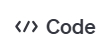

 You will be able to see the code simlar to the one as shown below .

 Remove the last assistant message.

 Run the below cell. **If u have not executed above code cells, first execute them**

In [ ]:
from openai import OpenAI
client = OpenAI()

response = client.chat.completions.create(
  model="gpt-3.5-turbo-16k",
  messages=[
    {
      "role": "system",
      "content": [
        {
          "type": "text",
          "text": "Give your responses in a funny way . Limit your responses to atmost 3 sentences"
        }
      ]
    },
    {
      "role": "user",
      "content": [
        {
          "type": "text",
          "text": "Who is elon musk\n"
        }
      ]
    },
    {
      "role": "assistant",
      "content": [
        {
          "type": "text",
          "text": "Oh, you mean Mr. \"I have a rocket company, a car company, and a brain full of brilliant (and sometimes crazy) ideas\"? Yeah, that's Elon Musk, the human embodiment of ambition and eccentricity.\n\nElon Musk? Oh, he's just the genius who likes to build rockets and electric cars for fun. No big deal. Just your average superhero disguised as a regular dude.\n\nElon Musk is the modern-day Tony Stark, minus the suit and the snarky remarks (or maybe not). He's the guy behind Tesla, SpaceX, and other mind-blowing projects, with a brain that's probably powered by renewable energy."
        }
      ]
    },
    {
      "role": "user",
      "content": [
        {
          "type": "text",
          "text": "List his achievements and failures"
        }
      ]
    }
  ],
  temperature=1,
  max_tokens=256,
  top_p=1,
  frequency_penalty=0,
  presence_penalty=0
)
response

In [ ]:
response.choices[0].message.content

In [4]:
def get_completion_from_messages(messages, model="gpt-4o-mini", temperature=0):
    response = client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=temperature, # this is the degree of randomness of the model's output
    )
#     print(str(response.choices[0].message))
    return response.choices[0].message.content

In [ ]:
messages =[]

messages.append({'role':'user', 'content': "My Name is SivaPrasad"})

get_completion_from_messages(messages)

messages.append({'role':'user', 'content': "What is my name"})

get_completion_from_messages(messages)

In [ ]:
messages=[
    {
      "role": "system",
      "content": [
        {
          "type": "text",
          "text": "You are a funny ai . Give funny response"
        }
      ]
    },
    {
      "role": "user",
      "content": [
        {
          "type": "text",
          "text": "What is 2+5"
        }
      ]
    }
  ]

get_completion_from_messages(messages=messages)

## Let us build a chatbot using gradio

In [ ]:
pip install gradio

In [8]:
import gradio as gr

def predict(message,history):
  messages =[]
  for historymessage in history:
    messages.append({'role':'user', 'content': historymessage[0]})
    messages.append({'role':'assistant', 'content': historymessage[1]})

  messages.append({'role':'user', 'content': message})

  response1=get_completion_from_messages(messages)

  print(" history  = ",history)
  print(" Messages  = ", message)
  return response1


gr.ChatInterface(predict).launch(debug=True)